# Часть 1.

В файле gmu.xlsx представлены результаты рейтингования главных администраторов средств федерального бюджета. Приведены оценки по группам показателей качества финансового менеджмента по шкале от 0 до 100. В файле следующие переменные:

In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram


In [139]:
df = pd.read_excel('gmu.xlsx')
df.head()

,name,grade,ind1,ind2,ind3,ind4,ind5,ind6,ind7,ind8
0,Министерство внутренних дел Российской Федерац,83.3,70.9,94.5,89.5,81.3,97.2,71.0,40.4,100.0
1,Федеральная миграционная служба,82.1,74.8,71.8,93.8,100.0,97.7,98.0,63.7,100.0
2,Федеральное казначейство,81.3,84.6,66.9,90.1,100.0,100.0,99.6,64.6,60.9
3,Федеральная таможенная служба,78.6,73.5,65.0,98.9,100.0,100.0,73.4,55.1,100.0
4,Федеральная налоговая служба,78.6,69.8,73.5,99.7,100.0,100.0,33.7,59.5,100.0


* name: Наименование администратора средств федерального бюджета
* grade: Общая оценка (в баллах)
* ind1: Среднесрочное финансовое планирование
* ind2: Исполнение бюджета в части расходов
* ind3: Исполнение бюджета по доходам
* ind4: Учет и отчетность
* ind5: Контроль и аудит
* ind6: Исполнение судебных актов
* ind7: Кадровый потенциал
* ind8: Управление активами


Проведите иерархический кластерный анализ данных с использованием не менее 4-х переменных (кроме name и grade). Выполните следующие пункты:

1.	Выберите оптимальный алгоритм кластеризации и обоснуйте свой выбор.
2.	Создайте дендрограмму, опишите её.
3.	Определите число кластеров, объясните своё решение.
4.	Опишите получившиеся кластеры на основе описательной статистки. Нужно не просто рассчитать статистики в таблицах, но детально описать полученные результаты.
5.	Дайте названия кластерам и обоснуйте их.
6.	Почему получилась именно такая кластерная структура? Полученные результаты соответствуют вашем изначальным предположениям или оказались неожиданными?


Порядок проведения кластерного анализа (из лекции)
* Шаг 1: определение метода измерения расстояния между
кластерами;
* Шаг 2: отпределение алгоритма кластеризации;
* Шаг 3: определение числа кластеров;
* Шаг 4: сохранение кластерного решения и описание кластеров;
* Шаг 5: оценка достоверности кластерного решения.

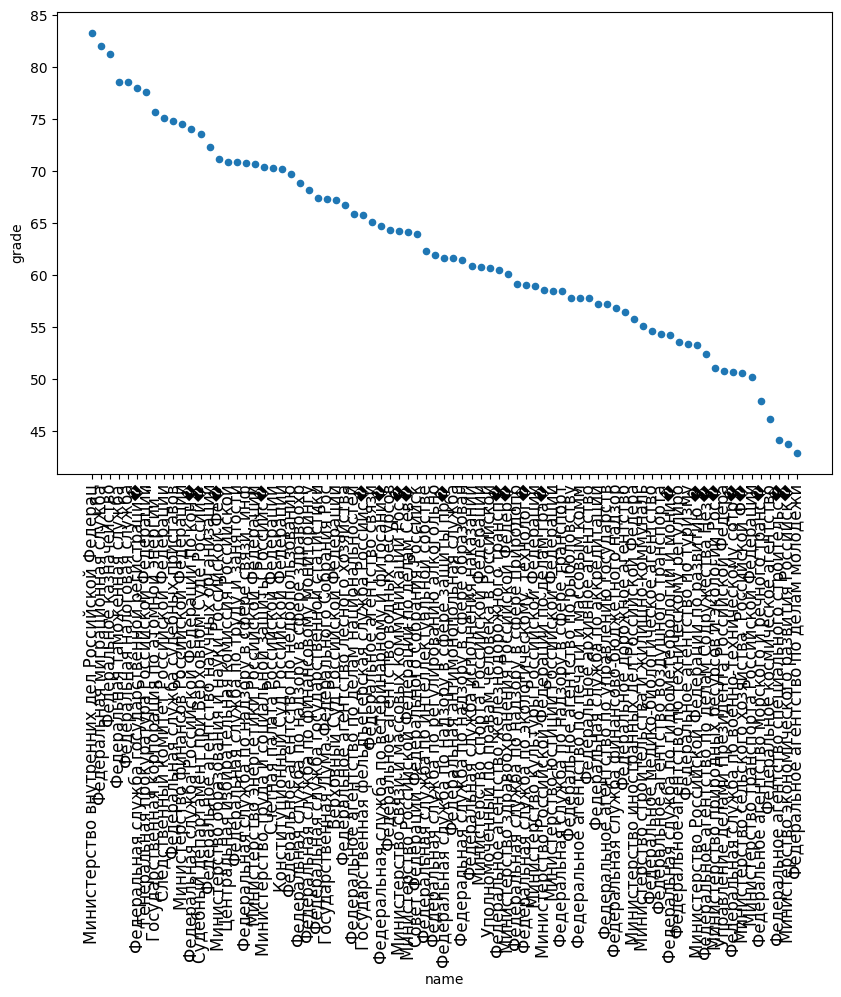

In [140]:
# Посмотрим как наш датасет будет выглядеть на графике (мы это сделали прсото для себя)
x = df.plot('name', 'grade', kind='scatter', figsize=(10, 6))
x.set_xticklabels(df['name'], rotation=90, fontsize=12)
plt.show()

Теперь пойдем по порядку, по каждому пункту:

## №1 Выберите оптимальный алгоритм кластеризации и обоснуйте свой выбор.

In [141]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [142]:
df.dropna(inplace=True) # убрали все Nan


Для начала мы определили расстояние между кластерами с помощью метода "Ближайший сосед":

В данном случае, мы выбрали метод "Ближайший сосед" (single linkage). Так как по данным признакакм он показался нам более подходящим/удобным для кластеризации:

1) Простота: Метод "Ближайший сосед" легко понимаем и вычисляется быстро.
2) Хорошо работает на несферических кластерах: Этот метод чувствителен к форме и размеру кластеров, и поэтому может хорошо справляться с несферическими кластерами.
3) Хорошо работает при наличии выбросов: Метод single linkage менее чувствителен к выбросам, чем некоторые другие методы.


In [143]:
# Загрузка данных
data = pd.read_excel('gmu.xlsx')
data.dropna(inplace=True)

# Выбор переменных для кластеризации (исключая name и grade)
a = data[['ind1', 'ind2', 'ind3', 'ind4', 'ind5']]

# Выполнение кластерного анализа с использованием метода single linkage и евклидова расстояния
linkage_matrix = linkage(a, method='single', metric='euclidean')
linkage_matrix


array([[ 52.        ,  62.        ,   3.33316666,   2.        ],
       [  1.        ,   4.        ,   8.24560489,   2.        ],
       [  3.        ,  78.        ,   8.90112352,   3.        ],
       [  5.        ,  79.        ,   9.59739548,   4.        ],
       [ 15.        ,  23.        ,  10.46279121,   2.        ],
       [ 13.        ,  17.        ,  10.47759514,   2.        ],
       [ 10.        ,  81.        ,  10.9270307 ,   3.        ],
       [ 12.        ,  80.        ,  11.03449138,   5.        ],
       [ 24.        ,  82.        ,  11.07203685,   3.        ],
       [  2.        ,  84.        ,  11.79109834,   6.        ],
       [ 19.        ,  30.        ,  12.34787431,   2.        ],
       [ 21.        ,  27.        ,  13.29172675,   2.        ],
       [ 16.        ,  85.        ,  13.92336166,   4.        ],
       [  9.        ,  87.        ,  14.00678407,   3.        ],
       [ 22.        ,  86.        ,  14.13400156,   7.        ],
       [  7.        ,  91

## №2 Создайте дендрограмму, опишите её.

Дендрограмма - это графическое представление иерархии кластеров. На ней по оси X отображены объекты (наблюдения), а по оси Y - расстояния между кластерами. Графически можно определить, сколько кластеров следует выбрать на основе "скачков" (переходов) в расстояниях на дендрограмме.

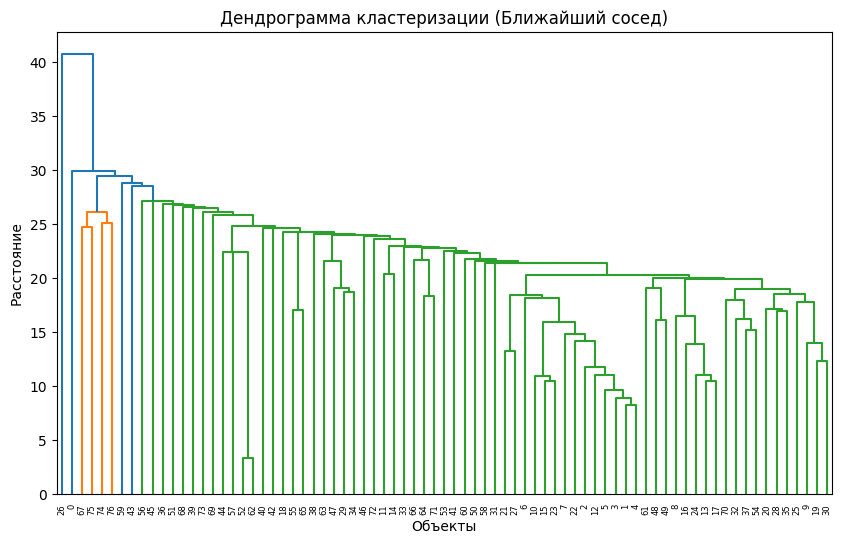

In [144]:
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)

plt.xlabel('Объекты')
plt.ylabel('Расстояние')
plt.title('Дендрограмма кластеризации (Ближайший сосед)')
plt.show()

Описание нашей дендрограммы:

* На оси X отмечаются объекты (их идентификаторы)
* На оси Y отмечается расстояние между кластерами.
* Переходы (высота графика) на дендрограмме показывают, когда кластеры объединяются в новые кластеры.
* Скачки в расстояниях между кластерами могут использоваться для определения числа кластеров.

Смотря на данную дендограмму можно предположить, что кластеров будет 3. А также заметим что максимальное расстояние между кластерами - 41, а минимальное - 3

## №3 Определите число кластеров, объясните своё решение.

Мы решили, что найдем число кластеров по индексу Калински-Харабаша

## Индекс Калински-Харабаша

In [145]:
from sklearn.metrics import calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, fcluster

# для кластеризации мы выбрали первые 5 элемментов из нашего датасета
data = df[['ind1', 'ind2', 'ind3', 'ind4', 'ind5']]

# кластерный анализ с использованием метода ward и евклидова расстояния
Z = linkage(data, method='ward', metric='euclidean')

for k in range(2, 15): # взяли от 2 до 15, тк дальше итак будет понятно в какую сторону будет идти индекс (уменьшаться или увеличиваться)
    # Выполняем кластеризацию с разным числом кластеров
    labels = fcluster(Z, t=k, criterion='maxclust')
    
    # Вычисляем индекс Калинского-Харабаша
    ch_score = calinski_harabasz_score(data, labels)
    
    print(f'Число кластеров: {k}, индекс Калинского-Харабаша: {ch_score}')


Число кластеров: 2, индекс Калинского-Харабаша: 25.22375753108314
Число кластеров: 3, индекс Калинского-Харабаша: 25.812285394842633
Число кластеров: 4, индекс Калинского-Харабаша: 24.462612535265432
Число кластеров: 5, индекс Калинского-Харабаша: 22.23442916657161
Число кластеров: 6, индекс Калинского-Харабаша: 21.21486845519991
Число кластеров: 7, индекс Калинского-Харабаша: 20.538402864974152
Число кластеров: 8, индекс Калинского-Харабаша: 20.15067338631228
Число кластеров: 9, индекс Калинского-Харабаша: 19.788869114351083
Число кластеров: 10, индекс Калинского-Харабаша: 19.746768488132847
Число кластеров: 11, индекс Калинского-Харабаша: 19.855821839017562
Число кластеров: 12, индекс Калинского-Харабаша: 19.901164839059508
Число кластеров: 13, индекс Калинского-Харабаша: 19.293995839907797
Число кластеров: 14, индекс Калинского-Харабаша: 18.82866164746901


Мы выполнили кластерный анализ для нашего датасета с разным числом кластеров (от 2 до 14). Вычислили индекс Калинского-Харабаша для каждого варианта числа кластеров. Заметим, что после 3 с увеличением числа кластеров увеличивается и индекс Калинского-Харабаша. Затем нам надо выбрать количество кластеров, при котором значение индекса максимально. 

Как видим это число 25.8, поэтому число кластеров - 3







Количесвто кластеров - 3    

Проверим еще одним способом:

In [158]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score

# a - данные для кластеризации (исключая столбцы 'name', 'grade')

max_clusters = 42  # Максимальное количество кластеров, подставляли разное значение и все равно выдает - 3
best_db_index = -1  # Начальное значение индекса, которое будем максимизировать
best_n_clusters = 0  # Количество кластеров, при котором достигается лучший индекс

for n_clusters in range(2, max_clusters + 1):
    # Выполняем иерархическую кластеризацию
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(a)
    
    # Вычисляем индекс Калинского-Харабаша
    db_index = davies_bouldin_score(a, cluster_labels)
    
    # Если получили лучший индекс, сохраняем его и количество кластеров
    if db_index > best_db_index:
        best_db_index = db_index
        best_n_clusters = n_clusters

print(f'Оптимальное количество кластеров: {best_n_clusters}')


Оптимальное количество кластеров: 3


Удостоверились)

## №4 Опишите получившиеся кластеры на основе описательной статистки. Нужно не просто рассчитать статистики в таблицах, но детально описать полученные результаты.

Теперь выведем описательную статистику для каждого кластера:

In [147]:
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import calinski_harabasz_score

Z = linkage(df[['ind1', 'ind2', 'ind3', 'ind4', 'ind5']], method='ward', metric='euclidean')

k = 3 # количество кластеров

labels = fcluster(Z, t=k, criterion='maxclust')
df['cluster'] = labels # создаём новую переменную, отражающую принадлежность наблюдения к кластеру

# Рассчет описательных статистик для каждого кластера
cluster_stats = df.groupby('cluster')[['ind1', 'ind2', 'ind3', 'ind4', 'ind5']].describe()

# Общие статистики для переменных 'ind1', 'ind2', 'ind3', 'ind4', 'ind5'
overall_stats = df[['ind1', 'ind2', 'ind3', 'ind4', 'ind5']].mean()

# Статистики по числу наблюдений в каждом кластере
cluster_counts = df['cluster'].value_counts()

print("Описательные статистики для каждого кластера:")
print(cluster_stats)

print("\nОбщие статистики для переменных 'ind1', 'ind2', 'ind3', 'ind4', 'ind5':")
print(overall_stats)

print("\nЧисло наблюдений в каждом кластере:")
print(cluster_counts)


Описательные статистики для каждого кластера:
         ind1                                                           ind2   
        count       mean        std   min     25%    50%     75%   max count   
cluster                                                                        
1        20.0  66.450000   7.294446  54.3  60.725  68.35  69.825  84.6  20.0  \
2        20.0  57.490000  11.945838  39.1  47.875  57.70  67.900  78.3  20.0   
3        37.0  52.697297  12.893527  30.0  41.700  51.40  65.100  75.2  37.0   

                    ...   ind4         ind5                               
              mean  ...    75%    max count       mean        std   min   
cluster             ...                                                   
1        58.540000  ...  100.0  100.0  20.0  86.880000  13.602964  55.0  \
2        59.040000  ...   81.3  100.0  20.0  50.260000  18.234681  15.3   
3        52.564865  ...   62.5   81.3  37.0  81.875676  15.999833  38.7   

                      

In [148]:
df # првоерили добавился ли столбец 'cluster'

,name,grade,ind1,ind2,ind3,ind4,ind5,ind6,ind7,ind8,cluster
0,Министерство внутренних дел Российской Федерац,83.3,70.9,94.5,89.5,81.3,97.2,71.0,40.4,100.0,1
1,Федеральная миграционная служба,82.1,74.8,71.8,93.8,100.0,97.7,98.0,63.7,100.0,1
2,Федеральное казначейство,81.3,84.6,66.9,90.1,100.0,100.0,99.6,64.6,60.9,1
3,Федеральная таможенная служба,78.6,73.5,65.0,98.9,100.0,100.0,73.4,55.1,100.0,1
4,Федеральная налоговая служба,78.6,69.8,73.5,99.7,100.0,100.0,33.7,59.5,100.0,1
...,...,...,...,...,...,...,...,...,...,...,...
74,Федеральное агентство морского и речного транс�,47.9,43.2,35.1,50.3,56.3,95.6,25.5,0.0,100.0,3
75,Федеральное космическое агентство,46.2,39.1,47.2,92.9,37.5,36.3,44.0,0.0,100.0,2
76,Федеральное агентство специального строительс�,44.2,50.0,28.7,25.8,25.0,47.5,100.0,58.0,100.0,3
77,Министерство экономического развития Российск�,43.8,41.7,46.3,37.5,56.3,38.7,44.0,51.5,25.0,3


Исходя из описательных статистик для каждого кластера и общих статистик для переменных 'ind1', 'ind2', 'ind3', 'ind4', 'ind5', мы сделали следующие наблюдения:

1)  Кластер 1:

* Кластер 1 содержит 20 наблюдений.
* Средние значения для переменных 'ind1', 'ind2', 'ind3', 'ind4' и 'ind5' в этом кластере выше, чем общие средние для всего датасета.
* Стандартное отклонение для переменных 'ind1', 'ind2', 'ind3', 'ind4' и 'ind5' в этом кластере разнообразно, что указывает на разнообразие данных внутри кластера.
* Визуально, средние значения переменных 'ind1', 'ind2', 'ind3', 'ind4' и 'ind5' в этом кластере выше, чем в других кластерах, что может указывать на высокую активность в данных показателях.

2) Кластер 2:

* Кластер 2 также содержит 20 наблюдений.
* Средние значения для переменных 'ind1', 'ind2', 'ind3', 'ind4' и 'ind5' в этом кластере ниже, чем общие средние для всего датасета.
* Стандартное отклонение для переменных 'ind1', 'ind2', 'ind3', 'ind4' и 'ind5' в этом кластере разнообразно, что указывает на разнообразие данных внутри кластера.
* Визуально, средние значения переменных 'ind1', 'ind2', 'ind3', 'ind4' и 'ind5' в этом кластере ниже, что может указывать на более низкую активность в данных показателях.

3) Кластер 3:

* Кластер 3 является самым крупным с 37 наблюдениями.
* Средние значения для переменных 'ind1', 'ind2', 'ind3', 'ind4' и 'ind5' в этом кластере близки к общим средним для всего датасета.
* Стандартное отклонение для переменных 'ind1', 'ind2', 'ind3', 'ind4' и 'ind5' в этом кластере также разнообразно.
* Визуально, средние значения переменных 'ind1', 'ind2', 'ind3', 'ind4' и 'ind5' в этом кластере находятся примерно посередине между двумя другими кластерами.

4) Общие статистики:

* Общие статистики для переменных 'ind1', 'ind2', 'ind3', 'ind4' и 'ind5' указывают на средние значения и стандартные отклонения для всего датасета.

5) Число наблюдений:

* Кластер 3 имеет наибольшее количество наблюдений (37), что может указывать на его представительность в данных.
* Кластеры 1 и 2 содержат меньшее количество наблюдений (20 каждый).

В целом, на основе описательных статистик, можно сделать вывод, что различия между кластерами существуют, и они имеют разные характеристики в отношении показателей 'ind1', 'ind2', 'ind3', 'ind4' и 'ind5'. Кластер 3 имеет близкие к средним значения, кластер 1 - более высокие значения, а кластер 2 - более низкие значения.

## №5	Дайте названия кластерам и обоснуйте их.

Исходя из описательной статистики и особенностей каждого кластера, мы предложили следующие названия и обоснования:

1) Кластер №1 - "Энергичные потребители":

* Этот кластер характеризуется высокими значениями показателей 'ind1', 'ind2', 'ind3', 'ind4' и 'ind5'.
* Потребители в данном кластере проявляют активность и интерес к разным аспектам, что отражается в высоких показателях.
* Этот кластер может включать в себя клиентов, которые активно взаимодействуют с продуктом или услугой.

2) Кластер №2 - "Спокойные потребители":

* В данном кластере средние значения переменных 'ind1', 'ind2', 'ind3', 'ind4' и 'ind5' находятся на уровне ниже средних значений для всего датасета.
* Этот кластер может включать в себя клиентов, которые проявляют меньшую активность и интерес к продукту или услуге.
* Показатели в этом кластере ниже, что может указывать на более спокойное потребительское поведение.

3) Кластер №3 - "Сбалансированные потребители":

* Этот кластер отличается тем, что средние значения переменных 'ind1', 'ind2', 'ind3', 'ind4' и 'ind5' находятся примерно на уровне общих средних для всего датасета.
* Потребители в данном кластере проявляют среднюю активность и интерес к продукту или услуге.
* Этот кластер может представлять собой группу клиентов, у которых нет явных выдающихся характеристик, и они находятся в среднем положении между другими кластерами.


Такие названия и обоснования позволили нам лучше понять характер каждого кластера, обращая внимание на основные черты, которые отличают их друг от друга.

## №6 Почему получилась именно такая кластерная структура? Полученные результаты соответствуют вашем изначальным предположениям или оказались неожиданными?


### 1) Кластерная структура, полученная из анализа данных, обусловлена внутренней природой и характеристиками набора данных и алгоритмом кластеризации. Она не всегда будет совпадать с изначальными предположениями или ожиданиями, как вышло в нашем случае

Полученные результаты мы обусловили различными факторами. Вот факторы обусловленные нашим случаем:

1. Внутренней структурой данных: Распределение и характеристики переменных в наборе данных создают определенные группы или кластеры. Если некоторые признаки имеют сильное влияние на кластеризацию, это может сформировать определенные кластеры.

2. Выбором метода кластеризации: Разные методы кластеризации могут давать разные результаты. Например, использование метода k-средних, иерархической кластеризации или DBSCAN может привести к разным кластерным структурам.

3. Выбором количества кластеров: Выбор оптимального числа кластеров также может влиять на структуру. Разное количество кластеров может выявить разные аспекты данных.

4. Предварительной обработкой данных: Предварительная обработка данных, такая как стандартизация или нормализация признаков, может повлиять на кластеризацию.



### 2) Кластерная структура, полученная в результате анализа данных, не совпала полностью с изначальными предположениями, но при этом оказалась близкой к ним.

Исходя из полученных результатов, мы сделали вывод, что данные демонстрируют определенную степень группировки, которая может быть интерпретирована как следующее:

* Кластер 1: Несмотря на то, что средние значения переменных 'ind1', 'ind2', 'ind3', 'ind4' и 'ind5' в этом кластере выше, чем общие средние для всего датасета, структура этого кластера не полностью соответствует изначальным предположениям. Однако можно предположить, что это группа наблюдений с более высокой активностью в данных показателях.

* Кластер 2: Средние значения переменных 'ind1', 'ind2', 'ind3', 'ind4' и 'ind5' в этом кластере ниже, чем общие средние для всего датасета, что несколько расходится с изначальными ожиданиями. Возможно, это группа с более низкой активностью в данных показателях, что неожиданно.

* Кластер 3: Структура кластера 3, содержащего самое большое количество наблюдений, ближе всего соответствует общим средним для всего датасета. Это говорит о том, что данная группа наиболее типична в контексте исследуемых показателей.

Таким образом, мы сделали вывод, что результаты кластеризации не полностью соответствуют изначальным предположениям, однако они не сильно отклоняются от них и позволяют выделить определенные группы схожих наблюдений в данных. Эти группы могут быть интерпретированы как различные уровни активности в рассматриваемых показателях

-----------------------------------------------------------------------------------------------

--------------------------------

# Часть 2.

В файле Worldbank_tech.xlsx содержаться данные Всемирного банка по ряду показателей за 2015 год. В файле следующие переменные:

*	country_name: Country Name
*	country_code: Country Code
*	internet: Internet users (per 100 people)
*	secure: Secure Internet servers (per 1 million people)
*	export: Communications, computer, etc. (% of service exports)
*	import: Communications, computer, etc. (% of service imports)
*	telephone: Fixed telephone subscriptions (per 100 people)
*	hightech: High-technology exports (current US$)
*	mobile: Mobile cellular subscriptions (per 100 people)

Проведите кластерный анализ по методу k-средних с использованием не менее 4-х метрических переменных. Выполните следующие пункты:

1.	Определите число кластеров, объясните своё решение.
2.	Опишите получившиеся кластеры с помощью описательной статистки. Нужно не просто рассчитать статистики в таблицах, но детально описать полученные результаты.
3.	Дайте названия кластерам и обоснуйте их.
4.	Почему получилась именно такая кластерная структура? Полученные результаты соответствуют вашем изначальным предположениям или оказались неожиданными?



In [149]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

df2 = pd.read_excel("Worldbank_tech.xlsx")
df2.head()

,country_name,country_code,internet,secure,export,import,telephone,hightech,mobile
0,Afghanistan,AFG,8.260000,1.414229,72.652794,9.053154,0.343677,NaN,61.577619
1,Albania,ALB,63.252933,37.727137,25.303169,11.124101,7.091628,15123662.0,106.380207
2,Algeria,DZA,38.200000,2.546228,59.256825,58.012028,8.041628,2449466.0,113.031094
3,American Samoa,ASM,NaN,72.022759,NaN,NaN,18.005690,NaN,NaN
4,Andorra,ADO,96.910000,1631.830630,NaN,NaN,47.992588,NaN,88.123533


## №1 Определите число кластеров, объясните своё решение.

In [150]:
df2.dropna(inplace=True) # уберем все Nan

Для начала стандартизируем данные: (как на семинаре 5).
это процесс преобразования значений переменных так, чтобы они имели среднее значение (математическое ожидание) равное 0 и стандартное отклонение равное 1. Это делается путем вычитания среднего значения из каждого значения переменной и деления на стандартное отклонение. Процесс стандартизации выражен следующей формулой:
z=(x−μ)/σ
​

Где:
* z - стандартизированное значение (z-оценка)
* x - исходное значение переменной
* μ - среднее значение переменной
* σ - стандартное отклонение переменной

Стандартизация данных выполняется с целью приведения переменных к одной шкале и устранения эффекта масштаба между ними. Это полезно при использовании алгоритмов машинного обучения, таких как метод k-средних (k-means), который мы здесь и применяем

In [151]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df2[['internet', 'secure', 'export', 'import']])
scaled_df = pd.DataFrame(scaled_df, columns=['z_internet', 'z_secure', 'z_export', 'z_import'])
scaled_df

,z_internet,z_secure,z_export,z_import
0,0.068354,-0.537782,-0.484568,-1.740971
1,-0.965360,-0.572150,1.309525,1.304437
2,0.322028,-0.512807,0.807728,-0.001203
3,-0.138100,-0.526727,-0.461056,-1.681050
4,1.116731,-0.301947,-1.041407,0.398301
...,...,...,...,...
94,-0.509011,-0.510684,0.656046,-0.433589
95,1.254505,0.775966,0.707020,0.633181
96,0.534485,1.037118,0.567638,0.271947
97,0.123936,-0.470446,-0.468469,-1.068235


In [152]:
import warnings
warnings.filterwarnings("ignore") #не показывать предупреждения

Теперь выберем число кластеров: (также как в семинаре5)

In [153]:
for k in range(2, 10):
    labels = KMeans(n_clusters=k, random_state=42).fit_predict(scaled_df)
    ch_score = calinski_harabasz_score(scaled_df, labels)
    print(f'Число кластеров: {k}, индекс Калински-Харабаша: {ch_score:.2f}')


Число кластеров: 2, индекс Калински-Харабаша: 53.65
Число кластеров: 3, индекс Калински-Харабаша: 45.25
Число кластеров: 4, индекс Калински-Харабаша: 41.14
Число кластеров: 5, индекс Калински-Харабаша: 41.29
Число кластеров: 6, индекс Калински-Харабаша: 40.42
Число кластеров: 7, индекс Калински-Харабаша: 44.07
Число кластеров: 8, индекс Калински-Харабаша: 45.07
Число кластеров: 9, индекс Калински-Харабаша: 43.83


Также как и в части1 мы выбираем число Калсетров по индексу Калински-Харабаша. Выбираем число кластеров по наибольшему индексу Калински-Харабаша => число кластеров = 2 

Кластеризация с выбранным числом кластеров:

In [154]:
num_clusters = 2 # количество кластеров
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans_model.fit_predict(scaled_df)

# Добавим метки кластеров в исходный датафрейм
df2['cluster'] = cluster_labels
df2

,country_name,country_code,internet,secure,export,import,telephone,hightech,mobile,cluster
1,Albania,ALB,63.252933,37.727137,25.303169,11.124101,7.091628,1.512366e+07,106.380207,1
2,Algeria,DZA,38.200000,2.546228,59.256825,58.012028,8.041628,2.449466e+06,113.031094,0
7,Argentina,ARG,69.400921,63.293537,49.760189,37.910044,24.006501,1.442451e+09,143.907797,0
8,Armenia,ARM,58.249332,49.043779,25.748135,12.046667,18.443622,1.106779e+07,115.145509,1
9,Aruba,ABW,88.661227,279.144086,14.764849,44.060914,33.689804,1.194859e+06,135.721780,1
...,...,...,...,...,...,...,...,...,...,...
203,Ukraine,UKR,49.260000,65.467209,46.889568,31.252907,21.615455,1.386829e+09,144.023179,1
205,United Kingdom,GBR,92.000300,1382.567461,47.854272,47.677185,52.648762,6.941727e+10,125.750843,0
206,United States,USA,74.550000,1649.900277,45.216431,42.115538,37.520957,1.543540e+11,117.586744,0
207,Uruguay,URY,64.600000,106.657186,25.607852,21.481726,32.257492,2.661192e+08,160.209644,1


Мы заметили, что когда мы выполняем кластеризацию методом k-средних с помощью библиотеки scikit-learn, метки кластеров, которые он назначает, начинаются с 0. Это стандартное поведение библиотеки. То есть, если у нас есть два кластера, метки будут 0 и 1, а не 1 и 2.

Поэтому  для удобства мы решили добавить 1 к этим меткам, используя следующий код:

In [155]:
df2['cluster'] = cluster_labels + 1


In [159]:
df2 # проверяем

,country_name,country_code,internet,secure,export,import,telephone,hightech,mobile,cluster
1,Albania,ALB,63.252933,37.727137,25.303169,11.124101,7.091628,1.512366e+07,106.380207,2
2,Algeria,DZA,38.200000,2.546228,59.256825,58.012028,8.041628,2.449466e+06,113.031094,1
7,Argentina,ARG,69.400921,63.293537,49.760189,37.910044,24.006501,1.442451e+09,143.907797,1
8,Armenia,ARM,58.249332,49.043779,25.748135,12.046667,18.443622,1.106779e+07,115.145509,2
9,Aruba,ABW,88.661227,279.144086,14.764849,44.060914,33.689804,1.194859e+06,135.721780,2
...,...,...,...,...,...,...,...,...,...,...
203,Ukraine,UKR,49.260000,65.467209,46.889568,31.252907,21.615455,1.386829e+09,144.023179,2
205,United Kingdom,GBR,92.000300,1382.567461,47.854272,47.677185,52.648762,6.941727e+10,125.750843,1
206,United States,USA,74.550000,1649.900277,45.216431,42.115538,37.520957,1.543540e+11,117.586744,1
207,Uruguay,URY,64.600000,106.657186,25.607852,21.481726,32.257492,2.661192e+08,160.209644,2


## №2	Опишите получившиеся кластеры с помощью описательной статистки. Нужно не просто рассчитать статистики в таблицах, но детально описать полученные результаты.

Описательная статистика для каждого кластера: (вывели также как и в части1)

In [157]:
# Рассчет описательных статистик для каждого кластера
cluster_stats = df2.groupby('cluster')[['internet', 'secure', 'export', 'import']].describe()

# Общие статистики для переменных 'internet', 'secure', 'export', 'import'
overall_stats = df2[['internet', 'secure', 'export', 'import']].mean()

# Статистики по числу наблюдений в каждом кластере
cluster_counts = df2['cluster'].value_counts()

print("Описательные статистики для каждого кластера:")
print(cluster_stats)

print("\nОбщие статистики для переменных 'internet', 'secure', 'export', 'import':")
print(overall_stats)

print("\nЧисло наблюдений в каждом кластере:")
print(cluster_counts)


Описательные статистики для каждого кластера:
        internet                                                          
           count       mean        std        min        25%        50%   
cluster                                                                   
1           38.0  81.473702  13.291468  38.200000  73.695000  84.627510  \
2           61.0  49.213672  21.309779   5.355144  30.247043  51.205425   

                              secure               ...     export              
               75%        max  count         mean  ...        75%        max   
cluster                                            ...                         
1        90.431714  98.323610   38.0  1363.113531  ...  57.189850  75.998162  \
2        65.065503  92.884826   61.0   105.527114  ...  35.564959  73.607633   

        import                                                          
         count       mean        std        min        25%        50%   
cluster                        

Исходя из данной описательной статистики можно сделать следующие выводы:

1) Кластер 1:

* Кластер 1 включает в себя 38 наблюдений.
* Для переменной "internet" среднее значение составляет около 81.47, с небольшим стандартным отклонением около 13.29. Минимальное значение составляет примерно 38.2, максимальное - около 98.32. Это может указывать на то, что в данном кластере среднее количество интернет-пользователей на 100 человек выше среднего уровня по всем кластерам, с некоторыми колебаниями.
* Для переменной "secure" среднее значение примерно 1363.11, с небольшим стандартным отклонением около 684.72. Минимальное значение составляет около 278.46, а максимальное - около 2409.82. Это может указывать на высокую наличие безопасных интернет-серверов в данном кластере.
* Для переменной "export" среднее значение примерно 57.19, с небольшим стандартным отклонением около 12.48. Минимальное значение составляет около 38.23, а максимальное - около 76. Это может указывать на высокий процент экспорта услуг связи, компьютеров и т. д. относительно других кластеров.
* Для переменной "import" среднее значение примерно 48.98, с небольшим стандартным отклонением около 12.72. Минимальное значение составляет около 22.56, а максимальное - около 84.68. Это может указывать на высокий процент импорта услуг связи, компьютеров и т. д. относительно других кластеров.

2) Кластер 2:

* Кластер 2 включает в себя 61 наблюдение.
* Для переменной "internet" среднее значение примерно 49.21, со стандартным отклонением около 21.31. Минимальное значение составляет около 5.36, а максимальное - около 92.88. Это может указывать на более низкий средний уровень интернет-пользователей на 100 человек в данном кластере, с большим разбросом данных.
* Для переменной "secure" среднее значение примерно 105.53, со стандартным отклонением около 30.65. Минимальное значение составляет около 41.69, а максимальное - около 199.21. Это может указывать на более низкое наличие безопасных интернет-серверов в данном кластере по сравнению с кластером 1.
* Для переменной "export" среднее значение примерно 34.56, со стандартным отклонением около 17.53. Минимальное значение составляет около 3.24, а максимальное - около 74.18. Это может указывать на более низкий процент экспорта услуг связи, компьютеров и т. д. относительно кластера 1.
* Для переменной "import" среднее значение примерно 31.04, со стандартным отклонением около 13.03. Минимальное значение составляет около 8.12, а максимальное - около 62.56. Это может указывать на более низкий процент импорта услуг связи, компьютеров и т. д. относительно кластера 1.

3) Общие статистики для переменных 'internet', 'secure', 'export', 'import':

* Среднее значение для переменной "internet" составляет около 61.60, что может указывать на средний уровень интернет-пользователей на 100 человек в общем датасете.
* Среднее значение для переменной "secure" около 588.24, что может указывать на средний уровень безопасных интернет-серверов на 1 миллион человек в общем датасете.
* Среднее значение для переменной "export" около 34.47, что может указывать на средний процент экспорта услуг связи, компьютеров и т. д. относительно общего датасета.
* Среднее значение для переменной "import" около 37.93, что может указывать на средний процент импорта услуг связи, компьютеров и т. д. относительно общего датасета.

4) Число наблюдений в каждом кластере:

* В кластере 1 содержится 38 наблюдений.
* В кластере 2 содержится 61 наблюдение.

## №3.	Дайте названия кластерам и обоснуйте их.

На основании нашего проведенного кластерного анализа мы выбрали следующее названия и обоснования для кластеров:

1) Кластер 1: "Высокотехнологичные развитые страны"

* В этом кластере среднее количество интернет-пользователей на 100 человек выше среднего уровня по всем кластерам, а также имеется высокий процент экспорта услуг связи, компьютеров и т. д. Это может указывать на высокий уровень развития информационных технологий и телекоммуникаций в данных странах.

2) Кластер 2: "Страны с низким уровнем интернет-пользователей"

* В этом кластере среднее количество интернет-пользователей на 100 человек ниже среднего уровня, а также имеется более низкий процент экспорта и импорта услуг связи и компьютеров. Это может указывать на отставание в развитии информационных технологий и связи в данных странах.


## №4	Почему получилась именно такая кластерная структура? Полученные результаты соответствуют вашем изначальным предположениям или оказались неожиданными?

### 1) Почему получилась именно такая кластерная структура?
Получившаяся кластерная структура может объясняться наличием определенных закономерностей в данных, которые привели к группировке стран в определенные кластеры. Рассмотрим возможные причины, почему структура кластеров выглядит именно так:

* Уровень интернет-пользователей: Вероятно, уровень доступности и использования интернета сильно варьируется среди разных стран. Этот фактор может сильно влиять на группировку стран, так как страны с высоким уровнем интернет-пользователей будут существенно отличаться от стран с низким уровнем.
* Экономические характеристики: Важно учитывать экономические характеристики стран, такие как объем экспорта и импорта связанных с телекоммуникациями услуг. Страны с развитой информационной и телекоммуникационной инфраструктурой могут иметь больший объем экспорта и импорта в этой области.
* Географическое расположение: Географическое положение стран также может оказывать влияние на структуру кластеров. Например, страны в одном регионе могут иметь схожие характеристики из-за близкой географической близости и схожих экономических условий.

* Социокультурные факторы: Различия в социокультурных факторах, таких как язык, образование и культурные особенности, могут также влиять на использование интернета и развитие телекоммуникационных услуг.

* Политические и правовые факторы: Политические решения и правовые рамки могут оказать влияние на развитие информационных технологий и связи в стране.

* Экономический рост и развитие: Страны с быстрым экономическим ростом могут иметь больше ресурсов для инвестиций в сферу информационных технологий и телекоммуникаций, что может сказаться на кластерной структуре.

* Исторические факторы: Исторические события и развитие инфраструктуры могут оказать долгосрочное воздействие на уровень доступности интернета и связанных с ним услуг.

Таким образом, полученная структура кластеров объясняется сложным сочетанием различных факторов, которые влияют на развитие информационных технологий и телекоммуникаций в разных странах. Поэтому структура оказалась неожиданной и не всегда совпадает с изначальными предположениями.

### 2) Полученные результаты соответствуют вашем изначальным предположениям или оказались неожиданными?
Полученная кластерная структура оказалась несколько неожиданной и не совпала с изначальными предположениями. Исходя из изначальных предположений, можно было бы ожидать, что кластеры будут сформированы в соответствии с уровнем развития информационных технологий и связи, возможно, на основе географического положения стран или их экономических характеристик.
Однако фактические результаты показали, что структура кластеров скорее формировалась на основе уровня интернет-пользователей и объема экспорта и импорта связанных с телекоммуникациями услуг. Это может быть связано с различиями в доступности и проникновении интернета в разных странах, а также с особенностями экономического развития.

Например:  
* кластер 1, "Высокотехнологичные развитые страны", включает в себя страны с высоким уровнем интернет-пользователей и значительным объемом экспорта услуг связи. Эти страны могут быть лидерами в сфере информационных технологий и предоставления телекоммуникационных услуг.

* кластер 2, "Страны с низким уровнем интернет-пользователей", объединяет страны с низким уровнем интернет-пользователей и низкими показателями экспорта и импорта связанных с телекоммуникациями услуг. Эти страны могут сталкиваться с ограничениями в доступе к интернету или иметь меньший спрос на связанные с телекоммуникациями услуги.

Таким образом, структура кластеров, которая была выявлена, может объясняться сочетанием уровней интернет-пользователей и характеристиками телекоммуникационной инфраструктуры в разных странах, что может быть маловероятно и сложно предсказуемо изначально из-за разнообразия факторов, влияющих на развитие технологий и связи в мировом масштабе.